# **Testing Fine-tuning & Data Preparation method**

> Now we want to make sure that our method is appropriate for our senior project

- LoRA fine-tuning or Freezing Layer or Full-parameter fine-tuning.
- Deleting the AI-Generated structure will effect the performance or not.
- Data Preparation like lowercase or delete the stop word will effect the performance or not



# Import dataset and library

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('/kaggle/input/original/original_dataset.csv')
df.head()

,text,label,prompt_name,source,RDizzl3_seven
0,Phones\n\nModern humans today are always on th...,0,Phones and driving,persuade_corpus,False
1,This essay will explain if drivers should or s...,0,Phones and driving,persuade_corpus,False
2,Driving while the use of cellular devices\n\nT...,0,Phones and driving,persuade_corpus,False
3,Phones & Driving\n\nDrivers should not be able...,0,Phones and driving,persuade_corpus,False
4,Cell Phone Operation While Driving\n\nThe abil...,0,Phones and driving,persuade_corpus,False


In [3]:
df = df[['text','label']]
df.head()

,text,label
0,Phones\n\nModern humans today are always on th...,0
1,This essay will explain if drivers should or s...,0
2,Driving while the use of cellular devices\n\nT...,0
3,Phones & Driving\n\nDrivers should not be able...,0
4,Cell Phone Operation While Driving\n\nThe abil...,0


# Delete Duplicate row and missing values

In [4]:
#Check many possible ways that It will be null

df[df['text'].isnull()].head()

,text,label
44918,NaN,1
44944,NaN,1
45059,NaN,1
45074,NaN,1
45089,NaN,1


In [5]:
df[df['text'].apply(lambda x: isinstance(x, str) and x.strip() == '')].head()

,text,label
44920,\n\n,1
44936,\n\n,1
45169,\n\n,1
45275,,1
45475,\n\n,1


In [6]:
# Drop rows where 'text' is NaN or None
df = df.dropna(subset=['text'])

# Drop rows where 'text' is an empty string or whitespace
df = df[df['text'].str.strip() != '']

In [7]:
#Checking that there is no more missing value
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 65328 entries, 0 to 65507
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    65328 non-null  object
 1   label   65328 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.5+ MB


In [8]:
# Detect duplicates that in our dataset has duplicated or not.
df[df.duplicated() == True].shape

(0, 2)

In [9]:
#There are '\n' in most of essays. The reason maybe that It is new line (ขึ้นบรรทัดใหม่)
df[df['text'].str.contains('\n') == True].shape

(63463, 2)

In [10]:
#There are '\n' in most of essays. The reason maybe that It is new line (ขึ้นบรรทัดใหม่)
df[df['text'].str.contains('\r') == True].shape

(220, 2)

In [11]:
#There are '\n' in most of essays. The reason maybe that It is new line (ขึ้นบรรทัดใหม่)
df[df['text'].str.contains('\t') == True].shape

(1, 2)

In [12]:
#We try to replace '\n' with ' '
df['text'] = df['text'].str.replace('\n', ' ', regex=False)
df['text'] = df['text'].str.replace('\r', ' ', regex=False)
df['text'] = df['text'].str.replace('\t', ' ', regex=False)
df.head()

,text,label
0,Phones Modern humans today are always on thei...,0
1,This essay will explain if drivers should or s...,0
2,Driving while the use of cellular devices Tod...,0
3,Phones & Driving Drivers should not be able t...,0
4,Cell Phone Operation While Driving The abilit...,0


In [13]:
#df.to_csv('no_missing_dataset.csv',index = False)

In [14]:
df.shape

(65328, 2)

In [15]:
df.reset_index(drop=True, inplace=True)

In [16]:
df.head()

,text,label
0,Phones Modern humans today are always on thei...,0
1,This essay will explain if drivers should or s...,0
2,Driving while the use of cellular devices Tod...,0
3,Phones & Driving Drivers should not be able t...,0
4,Cell Phone Operation While Driving The abilit...,0


# 1.1 AI-deleted dataset

In [17]:
df1 = pd.read_csv('/kaggle/input/original/final_cleaned (1).csv')
df1.head()

,text,label,prompt_name,source
0,Phones Modern humans today are always on their...,0,Phones and driving,persuade_corpus
1,This essay will explain if drivers should or s...,0,Phones and driving,persuade_corpus
2,Driving while the use of cellular devices Toda...,0,Phones and driving,persuade_corpus
3,Phones & Driving Drivers should not be able to...,0,Phones and driving,persuade_corpus
4,Cell Phone Operation While Driving The ability...,0,Phones and driving,persuade_corpus


In [18]:
df1 = df1[['text','label']]
df1.head()

,text,label
0,Phones Modern humans today are always on their...,0
1,This essay will explain if drivers should or s...,0
2,Driving while the use of cellular devices Toda...,0
3,Phones & Driving Drivers should not be able to...,0
4,Cell Phone Operation While Driving The ability...,0


# 1.2 Lowercase all text dataset

In [19]:
df2 = df.copy()

In [20]:
# Lowercase the data in 'text_column'
df2['text'] = df2['text'].str.lower()

df2.head()

,text,label
0,phones modern humans today are always on thei...,0
1,this essay will explain if drivers should or s...,0
2,driving while the use of cellular devices tod...,0
3,phones & driving drivers should not be able t...,0
4,cell phone operation while driving the abilit...,0


# 1.3 Removing all Punctuation & Special Characters

In [21]:
df3 = df.copy()

In [22]:
#library that contains punctuation
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [23]:
#defining the function to remove punctuation
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree

In [24]:
df3['text'].apply(str)

0        Phones  Modern humans today are always on thei...
1        This essay will explain if drivers should or s...
2        Driving while the use of cellular devices  Tod...
3        Phones & Driving  Drivers should not be able t...
4        Cell Phone Operation While Driving  The abilit...
                               ...                        
65323      Dear Senator,  I am writing to you regarding...
65324      I remember the day distinctively. I was sitt...
65325      Dear Senator,   I am writing this letter to ...
65326      Dear Senator,  I am writing to urge you to e...
65327      It was a typical summer afternoon in my home...
Name: text, Length: 65328, dtype: object

In [25]:
#storing the puntuation free text
df3['text']= df3['text'].apply(lambda x:remove_punctuation(x))
df3.head()

,text,label
0,Phones Modern humans today are always on thei...,0
1,This essay will explain if drivers should or s...,0
2,Driving while the use of cellular devices Tod...,0
3,Phones Driving Drivers should not be able to...,0
4,Cell Phone Operation While Driving The abilit...,0


# Comparing all 4 types of dataset

## Training / Validation / Test set split

In [26]:
print(df.shape)
print(df1.shape)
print(df2.shape)
print(df3.shape)

(65328, 2)
(65328, 2)
(65328, 2)
(65328, 2)


In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming your 7 DataFrames are stored in a list
dfs = [df, df1, df2, df3]

# Iterate over each DataFrame and process them
for i, df in enumerate(dfs, start=0):
    # Select relevant columns
    df = df[['text', 'label']]

    # Sample 15,000 records from the DataFrame
    sampled_df = df.sample(n=15000, random_state=2092024)

    # Define outcome name
    outcomename = 'label'

    # Redefine X and Y after sampling
    X_sampled = sampled_df.drop(columns=outcomename)
    Y_sampled = sampled_df[outcomename]

    # Split into training and combined validation-test sets (80% train, 20% valid/test)
    X_train, X_valid_test, y_train, y_valid_test = train_test_split(
        X_sampled, Y_sampled, test_size=0.2, random_state=2092024, stratify=Y_sampled
    )

    # Split the combined validation-test set into separate validation and test sets (50% each of the remaining 20%)
    X_val, X_test, y_val, y_test = train_test_split(
        X_valid_test, y_valid_test, test_size=0.5, random_state=2092024, stratify=y_valid_test
    )

    # Assign each split to dynamically named variables (separate for features and labels)
    globals()[f'X_train_df{i}'] = X_train
    globals()[f'y_train_df{i}'] = y_train
    globals()[f'X_val_df{i}'] = X_val
    globals()[f'y_val_df{i}'] = y_val
    globals()[f'X_test_df{i}'] = X_test
    globals()[f'y_test_df{i}'] = y_test

# Now you have X_train_df1, y_train_df1, ..., X_train_df7, y_train_df7, X_val_df1, ..., y_test_df7

In [112]:
X_train_df2.iloc[3,0]

"i think social media has a huge impact on societal norms and values. social media is used by millions of people all around the world, and it has become an integral part of our daily lives. it has changed the way we interact with one another and has also influenced our behavior and beliefs.  one reason why i believe social media has a significant impact on societal norms and values is that it allows people to connect with others who share similar interests and beliefs. this can lead to the creation of echo chambers, where people are exposed only to opinions and views that are similar to their own. as a result, people may become more entrenched in their beliefs and less open to other perspectives.  for instance, if someone follows only conservative political pages on social media, they may become convinced that all liberal views are wrong, and they may be less willing to engage in dialogue or debate with people who hold different political views.  another way that social media has impac

In [57]:
X_train_df0.iloc[3,0]

"I think social media has a huge impact on societal norms and values. Social media is used by millions of people all around the world, and it has become an integral part of our daily lives. It has changed the way we interact with one another and has also influenced our behavior and beliefs.  One reason why I believe social media has a significant impact on societal norms and values is that it allows people to connect with others who share similar interests and beliefs. This can lead to the creation of echo chambers, where people are exposed only to opinions and views that are similar to their own. As a result, people may become more entrenched in their beliefs and less open to other perspectives.  For instance, if someone follows only conservative political pages on social media, they may become convinced that all liberal views are wrong, and they may be less willing to engage in dialogue or debate with people who hold different political views.  Another way that social media has impac

In [110]:
train_df2_dataset[3]['input_ids']

tensor([  101,  1045,  2228,  2591,  2865,  2038,  1037,  4121,  4254,  2006,
        23382, 17606,  1998,  5300,  1012,  2591,  2865,  2003,  2109,  2011,
         8817,  1997,  2111,  2035,  2105,  1996,  2088,  1010,  1998,  2009,
         2038,  2468,  2019,  9897,  2112,  1997,  2256,  3679,  3268,  1012,
         2009,  2038,  2904,  1996,  2126,  2057, 11835,  2007,  2028,  2178,
         1998,  2038,  2036,  5105,  2256,  5248,  1998,  9029,  1012,  2028,
         3114,  2339,  1045,  2903,  2591,  2865,  2038,  1037,  3278,  4254,
         2006, 23382, 17606,  1998,  5300,  2003,  2008,  2009,  4473,  2111,
         2000,  7532,  2007,  2500,  2040,  3745,  2714,  5426,  1998,  9029,
         1012,  2023,  2064,  2599,  2000,  1996,  4325,  1997,  9052,  8477,
         1010,  2073,  2111,  2024,  6086,  2069,  2000, 10740,  1998,  5328,
         2008,  2024,  2714,  2000,  2037,  2219,  1012,  2004,  1037,  2765,
         1010,  2111,  2089,  2468,  2062,  4372,  7913, 19282, 

In [111]:
train_df0_dataset[3]['input_ids']

tensor([  101,  1045,  2228,  2591,  2865,  2038,  1037,  4121,  4254,  2006,
        23382, 17606,  1998,  5300,  1012,  2591,  2865,  2003,  2109,  2011,
         8817,  1997,  2111,  2035,  2105,  1996,  2088,  1010,  1998,  2009,
         2038,  2468,  2019,  9897,  2112,  1997,  2256,  3679,  3268,  1012,
         2009,  2038,  2904,  1996,  2126,  2057, 11835,  2007,  2028,  2178,
         1998,  2038,  2036,  5105,  2256,  5248,  1998,  9029,  1012,  2028,
         3114,  2339,  1045,  2903,  2591,  2865,  2038,  1037,  3278,  4254,
         2006, 23382, 17606,  1998,  5300,  2003,  2008,  2009,  4473,  2111,
         2000,  7532,  2007,  2500,  2040,  3745,  2714,  5426,  1998,  9029,
         1012,  2023,  2064,  2599,  2000,  1996,  4325,  1997,  9052,  8477,
         1010,  2073,  2111,  2024,  6086,  2069,  2000, 10740,  1998,  5328,
         2008,  2024,  2714,  2000,  2037,  2219,  1012,  2004,  1037,  2765,
         1010,  2111,  2089,  2468,  2062,  4372,  7913, 19282, 

In [28]:
X_train_df0.tail()

,text
19782,A Electoral College is a meeting of the electo...
43523,It is no secret that cars have become an integ...
11032,Before I get into whether or not FACS is a val...
17314,"In the article ""Driverless Cars Are Coming' It..."
54785,"Dear State Senator, I am writing to you today..."


In [29]:
X_train_df1.tail()

,text
19782,A Electoral College is a meeting of the electo...
43523,It is no secret that cars have become an integ...
11032,Before I get into whether or not FACS is a val...
17314,"In the article ""Driverless Cars Are Coming' It..."
54785,"Dear State Senator, I am writing to you today ..."


In [30]:
X_train_df2.tail()

,text
19782,a electoral college is a meeting of the electo...
43523,it is no secret that cars have become an integ...
11032,before i get into whether or not facs is a val...
17314,"in the article ""driverless cars are coming' it..."
54785,"dear state senator, i am writing to you today..."


In [31]:
X_train_df3.tail()

,text
19782,A Electoral College is a meeting of the electo...
43523,It is no secret that cars have become an integ...
11032,Before I get into whether or not FACS is a val...
17314,In the article Driverless Cars Are Coming It t...
54785,Dear State Senator I am writing to you today ...


In [32]:
# Assuming dfs_original contains your 7 DataFrames: df1, df2, df3, df4, df5, df6, df7
dfs_original = [df, df1, df2, df3]

# Compare indices of each DataFrame with the next one in the list
for i in range(len(dfs_original) - 1):
    if dfs_original[i].index.equals(dfs_original[i + 1].index):
        print(f"DataFrame {i + 1} has the same index as DataFrame {i + 2}.")
    else:
        print(f"DataFrame {i + 1} does NOT have the same index as DataFrame {i + 2}.")

DataFrame 1 has the same index as DataFrame 2.
DataFrame 2 has the same index as DataFrame 3.
DataFrame 3 has the same index as DataFrame 4.


In [33]:
df1.iloc[32456,0]

"Dear Senator , I am writing to express my opinion on the issue of whether to keep the Electoral College or change to a popular vote system for the election of the President of the United States. After carefully considering the information from various sources, I firmly believe that it is in the best interest of our nation to maintain the Electoral College system. Though there are arguments in favor of both systems, the Electoral College provides several important benefits that should not be overlooked. One of the fundamental reasons to retain the Electoral College is the certainty of outcome. As stated in the passage by Judge Richard A. Posner, the winning candidate's share of the Electoral College typically exceeds their share of the popular vote. This ensures that the result of the election is decisive and minimizes the possibility of lengthy legal disputes. In contrast, a direct popular vote system could lead to close elections with no clear winner, which could potentially necessit

In [34]:
df2.iloc[32456,0]

"[your name] [your address] [city, state, zip code] [email address] [phone number] [date]  [senator's name] [senator's address] [city, state, zip code]  dear senator [senator's last name],  i am writing to express my opinion on the issue of whether to keep the electoral college or change to a popular vote system for the election of the president of the united states. after carefully considering the information from various sources, i firmly believe that it is in the best interest of our nation to maintain the electoral college system. though there are arguments in favor of both systems, the electoral college provides several important benefits that should not be overlooked.  one of the fundamental reasons to retain the electoral college is the certainty of outcome. as stated in the passage by judge richard a. posner, the winning candidate's share of the electoral college typically exceeds their share of the popular vote. this ensures that the result of the election is decisive and mini

# Training DistilBERT model

In [35]:
from transformers import AutoModelForSequenceClassification, TrainingArguments, Trainer,AutoTokenizer

model = AutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=2)
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

/opt/conda/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [36]:
import torch
from torch.utils.data import Dataset

# Custom dataset class
class CustomDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len=512):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, index):
        text = self.texts.iloc[index]
        label = self.labels.iloc[index]
        encoding = self.tokenizer(
            text,
            truncation=True,
            padding='max_length',
            max_length=self.max_len,
            return_tensors='pt'
        )
        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(label, dtype=torch.long)
        }



train_df0_dataset = CustomDataset(X_train_df0['text'], y_train_df0, tokenizer)
train_df1_dataset = CustomDataset(X_train_df1['text'], y_train_df1, tokenizer)
train_df2_dataset = CustomDataset(X_train_df2['text'], y_train_df2, tokenizer)
train_df3_dataset = CustomDataset(X_train_df3['text'], y_train_df3, tokenizer)


# For validation datasets
val_df0_dataset = CustomDataset(X_val_df0['text'], y_val_df0, tokenizer)
val_df1_dataset = CustomDataset(X_val_df1['text'], y_val_df1, tokenizer)
val_df2_dataset = CustomDataset(X_val_df2['text'], y_val_df2, tokenizer)
val_df3_dataset = CustomDataset(X_val_df3['text'], y_val_df3, tokenizer)

# For test datasets
test_df0_dataset = CustomDataset(X_test_df0['text'], y_test_df0, tokenizer)
test_df1_dataset = CustomDataset(X_test_df1['text'], y_test_df1, tokenizer)
test_df2_dataset = CustomDataset(X_test_df2['text'], y_test_df2, tokenizer)
test_df3_dataset = CustomDataset(X_test_df3['text'], y_test_df3, tokenizer)


In [37]:
train_df0_dataset[0]

{'input_ids': tensor([  101,  2045,  2024,  2116,  2367,  6699,  2008,  2017,  2175,  2083,
          2006,  1037,  3679,  3978,  1012,  2070,  1997,  2068,  2024, 24820,
         15323,  1998,  2500,  4995,  1005,  1056,  1012,  2296,  7603,  2008,
          2017,  2175,  2083,  2064,  2022,  2464,  2011,  2060,  2111,  2083,
          2115, 13268, 24240,  2015,  1012, 13268, 24240,  2015,  2024,  2590,
          1999,  2070, 12107,  1010,  2021,  2027,  2024,  2025,  2590,  2005,
          2495,  1012,  1996, 13268,  2895, 16861,  2291,  2052,  2031,  1037,
          2843,  1997,  3594,  2006,  1037,  2275,  2005,  1037,  2694,  2565,
          2030,  2377,  1012,  2009,  2071,  2393,  2191,  1037,  2275,  2448,
          2062, 18228,  2011,  8285, 18900,  2075,  5622,  5603, 24240,  2015,
          1998,  2054,  2025,  1012,  1996,  4500,  1997,  2008,  2003,  2995,
          2005,  2816,  1012,  2045,  2003,  2025,  1037,  2613,  2204,  3114,
          2005,  2816,  2000,  2224,  4

In [38]:
import torch

# Check if GPU is available
if torch.cuda.is_available():
    device = torch.device("cuda")
    print("GPU is available. Using GPU:", torch.cuda.get_device_name(0))
else:
    device = torch.device("cpu")
    print("GPU not available. Using CPU instead.")

model.to(device)

GPU is available. Using GPU: Tesla P100-PCIE-16GB


DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): MultiHeadSelfAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)
 

In [39]:
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=1)
    return metric.compute(predictions=predictions, references=labels)

In [59]:
!pip install evaluate

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 4.7 MB/s eta 0:00:00


In [41]:
#!pip install --upgrade pyarrow

In [60]:
import numpy as np
import evaluate

metric = evaluate.load("accuracy")

## Dataset 0

In [62]:
# Don't Show Warning Messages
import os
import warnings
warnings.filterwarnings('ignore')
os.environ["WANDB_DISABLED"] = "true"

In [85]:
from transformers import AutoModelForSequenceClassification, TrainingArguments, Trainer,AutoTokenizer

model = AutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=2)
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [86]:
model.to(device)

DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): MultiHeadSelfAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)
 

In [87]:
training_args = TrainingArguments(
    eval_strategy="epoch",
    output_dir="./results",
    learning_rate=2e-5,
    per_device_train_batch_size=32,
    per_device_eval_batch_size=32,
    num_train_epochs=3,
    weight_decay=0.01
)

# Initialize Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_df0_dataset,
    eval_dataset=val_df0_dataset,
    tokenizer = tokenizer,
    compute_metrics=compute_metrics,
)

# Fine-tune the model
trainer.train()

Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).


Epoch,Training Loss,Validation Loss,Accuracy
1,No log,0.104006,0.974000
2,0.073800,0.062876,0.984667
3,0.015800,0.072454,0.984667


TrainOutput(global_step=1125, training_loss=0.04033280807071262, metrics={'train_runtime': 1074.1336, 'train_samples_per_second': 33.515, 'train_steps_per_second': 1.047, 'total_flos': 4768826351616000.0, 'train_loss': 0.04033280807071262, 'epoch': 3.0})

In [88]:
from torch.utils.data import DataLoader

# Assuming you've already created your test_dataset
test_loader = DataLoader(test_df0_dataset, batch_size=32, shuffle=False)

In [89]:
import torch
import numpy as np

model.eval()  # Set the model to evaluation mode
all_predictions = []
all_true_labels = []

with torch.no_grad():
    for batch in test_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model(input_ids, attention_mask=attention_mask)
        _, predictions = torch.max(outputs.logits, dim=1)

        all_predictions.extend(predictions.cpu().numpy())
        all_true_labels.extend(labels.cpu().numpy())

# Convert to numpy arrays
y_pred = np.array(all_predictions)
y_true = np.array(all_true_labels)

              precision    recall  f1-score   support

           0       1.00      0.97      0.98       636
           1       0.98      1.00      0.99       864

    accuracy                           0.99      1500
   macro avg       0.99      0.98      0.99      1500
weighted avg       0.99      0.99      0.99      1500



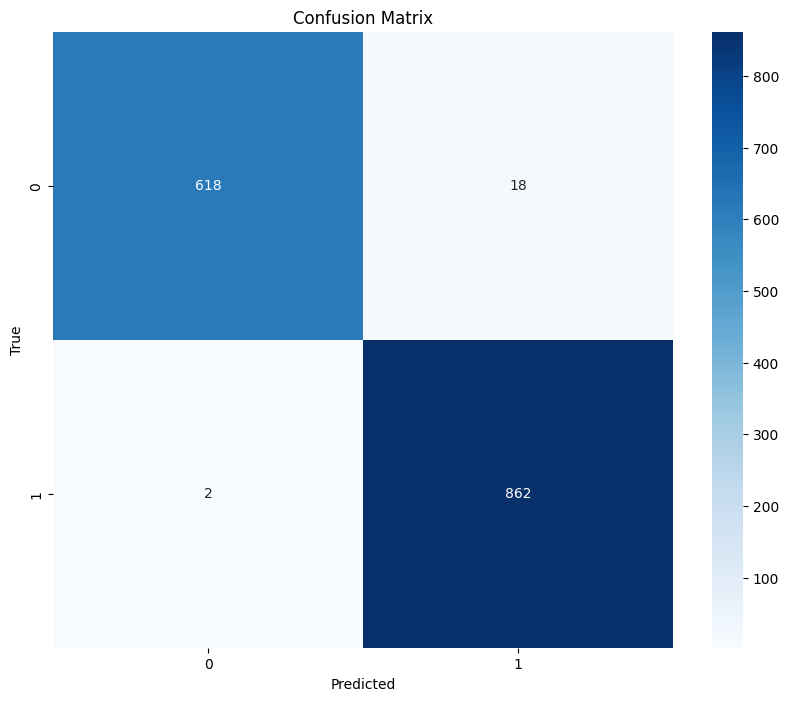

In [90]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Print classification report
print(classification_report(y_true, y_pred))

# Create confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## Dataset 1

In [91]:
from transformers import AutoModelForSequenceClassification, TrainingArguments, Trainer,AutoTokenizer

model = AutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=2)
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [92]:
model.to(device)

DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): MultiHeadSelfAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)
 

In [93]:
training_args = TrainingArguments(
    eval_strategy="epoch",
    output_dir="./results",
    learning_rate=2e-5,
    per_device_train_batch_size=32,
    per_device_eval_batch_size=32,
    num_train_epochs=3,
    weight_decay=0.01,
)

# Initialize Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_df1_dataset,
    eval_dataset=val_df1_dataset,
    tokenizer = tokenizer,
    compute_metrics=compute_metrics,
)

# Fine-tune the model
trainer.train()

Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).


Epoch,Training Loss,Validation Loss,Accuracy
1,No log,0.059221,0.983333
2,0.074200,0.079352,0.983333
3,0.016300,0.075002,0.984667


TrainOutput(global_step=1125, training_loss=0.04068656465742323, metrics={'train_runtime': 1075.3175, 'train_samples_per_second': 33.478, 'train_steps_per_second': 1.046, 'total_flos': 4768826351616000.0, 'train_loss': 0.04068656465742323, 'epoch': 3.0})

In [94]:
from torch.utils.data import DataLoader

# Assuming you've already created your test_dataset
test_loader = DataLoader(test_df1_dataset, batch_size=32, shuffle=False)

In [95]:
import torch
import numpy as np

model.eval()  # Set the model to evaluation mode
all_predictions = []
all_true_labels = []

with torch.no_grad():
    for batch in test_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model(input_ids, attention_mask=attention_mask)
        _, predictions = torch.max(outputs.logits, dim=1)

        all_predictions.extend(predictions.cpu().numpy())
        all_true_labels.extend(labels.cpu().numpy())

# Convert to numpy arrays
y_pred = np.array(all_predictions)
y_true = np.array(all_true_labels)

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       636
           1       0.97      1.00      0.99       864

    accuracy                           0.98      1500
   macro avg       0.98      0.98      0.98      1500
weighted avg       0.98      0.98      0.98      1500



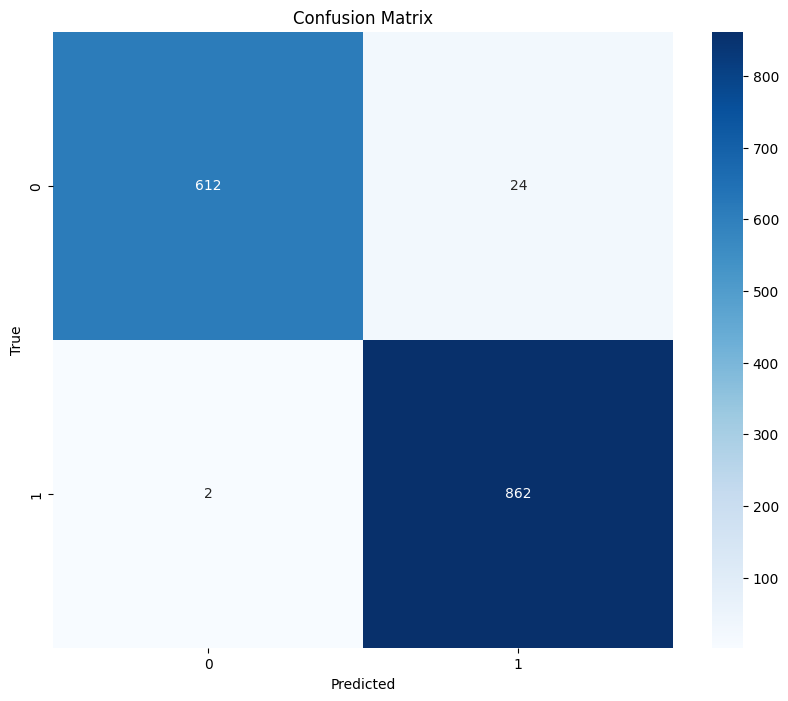

In [96]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Print classification report
print(classification_report(y_true, y_pred))

# Create confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## Dataset 2

In [97]:
from transformers import AutoModelForSequenceClassification, TrainingArguments, Trainer,AutoTokenizer

model = AutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=2)
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [98]:
model.to(device)

DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): MultiHeadSelfAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)
 

In [99]:
training_args = TrainingArguments(
    eval_strategy="epoch",
    output_dir="./results",
    learning_rate=2e-5,
    per_device_train_batch_size=32,
    per_device_eval_batch_size=32,
    num_train_epochs=3,
    weight_decay=0.01,
)

# Initialize Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_df2_dataset,
    eval_dataset=val_df2_dataset,
    tokenizer = tokenizer,
    compute_metrics=compute_metrics,
)

# Fine-tune the model
trainer.train()

Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).


Epoch,Training Loss,Validation Loss,Accuracy
1,No log,0.059499,0.986667
2,0.072500,0.095038,0.980000
3,0.016800,0.076199,0.986000


TrainOutput(global_step=1125, training_loss=0.04018248452080621, metrics={'train_runtime': 1074.6367, 'train_samples_per_second': 33.5, 'train_steps_per_second': 1.047, 'total_flos': 4768826351616000.0, 'train_loss': 0.04018248452080621, 'epoch': 3.0})

In [100]:
from torch.utils.data import DataLoader

# Assuming you've already created your test_dataset
test_loader = DataLoader(test_df2_dataset, batch_size=32, shuffle=False)

In [101]:
import torch
import numpy as np

model.eval()  # Set the model to evaluation mode
all_predictions = []
all_true_labels = []

with torch.no_grad():
    for batch in test_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model(input_ids, attention_mask=attention_mask)
        _, predictions = torch.max(outputs.logits, dim=1)

        all_predictions.extend(predictions.cpu().numpy())
        all_true_labels.extend(labels.cpu().numpy())

# Convert to numpy arrays
y_pred = np.array(all_predictions)
y_true = np.array(all_true_labels)

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       636
           1       0.97      1.00      0.98       864

    accuracy                           0.98      1500
   macro avg       0.98      0.98      0.98      1500
weighted avg       0.98      0.98      0.98      1500



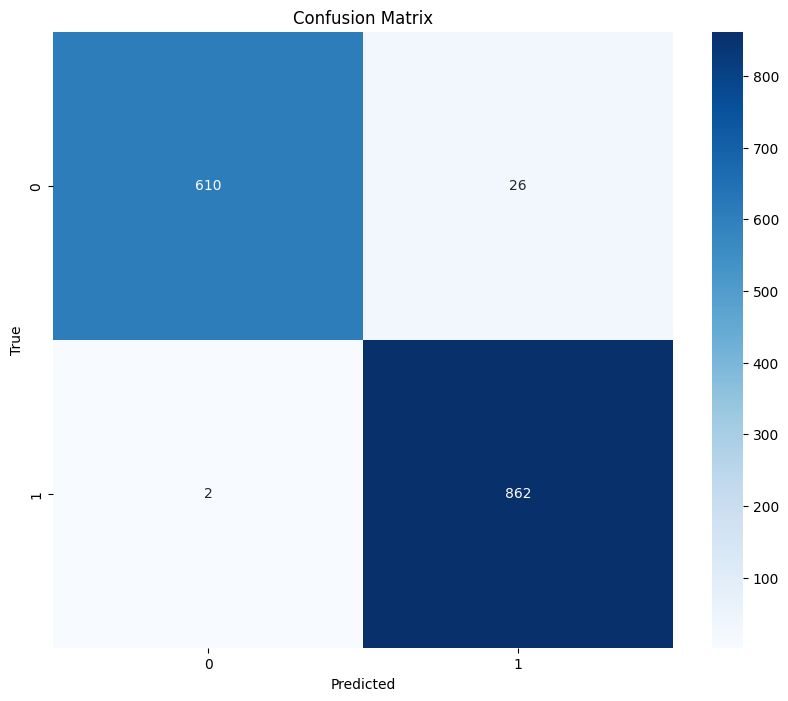

In [102]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Print classification report
print(classification_report(y_true, y_pred))

# Create confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## Dataset 3

In [103]:
from transformers import AutoModelForSequenceClassification, TrainingArguments, Trainer,AutoTokenizer

model = AutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=2)
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [104]:
model.to(device)

DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): MultiHeadSelfAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)
 

In [105]:
training_args = TrainingArguments(
    eval_strategy="epoch",
    output_dir="./results",
    learning_rate=2e-5,
    per_device_train_batch_size=32,
    per_device_eval_batch_size=32,
    num_train_epochs=3,
    weight_decay=0.01,
)

# Initialize Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_df3_dataset,
    eval_dataset=val_df3_dataset,
    tokenizer = tokenizer,
    compute_metrics=compute_metrics,
)

# Fine-tune the model
trainer.train()

Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).


Epoch,Training Loss,Validation Loss,Accuracy
1,No log,0.036301,0.989333
2,0.090500,0.228864,0.953333
3,0.017500,0.087997,0.982000


TrainOutput(global_step=1125, training_loss=0.04863801500532362, metrics={'train_runtime': 1073.6362, 'train_samples_per_second': 33.531, 'train_steps_per_second': 1.048, 'total_flos': 4768826351616000.0, 'train_loss': 0.04863801500532362, 'epoch': 3.0})

In [106]:
from torch.utils.data import DataLoader

# Assuming you've already created your test_dataset
test_loader = DataLoader(test_df3_dataset, batch_size=32, shuffle=False)

In [107]:
import torch
import numpy as np

model.eval()  # Set the model to evaluation mode
all_predictions = []
all_true_labels = []

with torch.no_grad():
    for batch in test_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model(input_ids, attention_mask=attention_mask)
        _, predictions = torch.max(outputs.logits, dim=1)

        all_predictions.extend(predictions.cpu().numpy())
        all_true_labels.extend(labels.cpu().numpy())

# Convert to numpy arrays
y_pred = np.array(all_predictions)
y_true = np.array(all_true_labels)

              precision    recall  f1-score   support

           0       1.00      0.95      0.97       636
           1       0.96      1.00      0.98       864

    accuracy                           0.98      1500
   macro avg       0.98      0.97      0.98      1500
weighted avg       0.98      0.98      0.98      1500



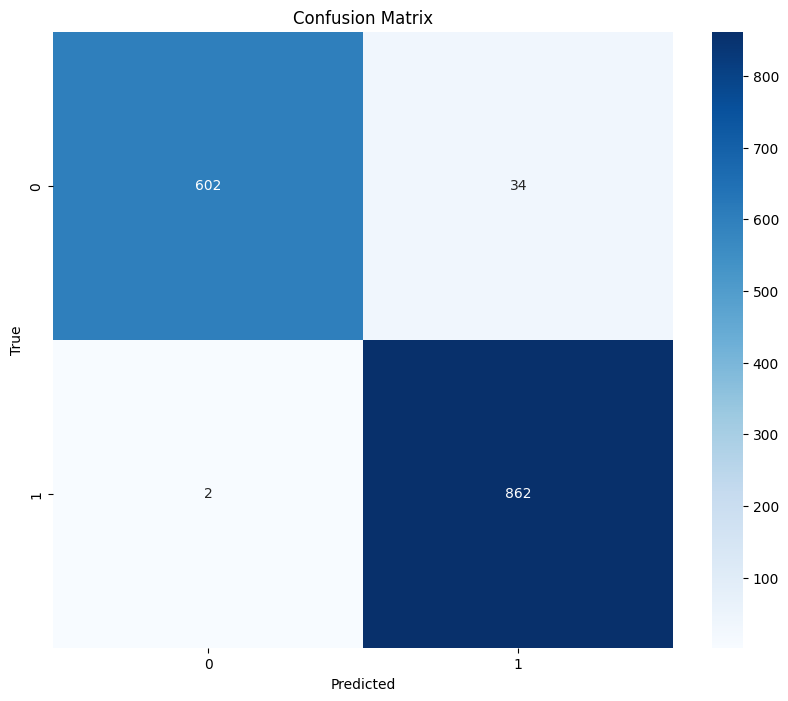

In [108]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Print classification report
print(classification_report(y_true, y_pred))

# Create confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Training RoBERTa model

In [113]:
from transformers import RobertaTokenizer, RobertaForSequenceClassification, Trainer, TrainingArguments

model = RobertaForSequenceClassification.from_pretrained("FacebookAI/roberta-base", num_labels=2)
tokenizer = RobertaTokenizer.from_pretrained("FacebookAI/roberta-base")

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at FacebookAI/roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

In [114]:
import torch
from torch.utils.data import Dataset

# Custom dataset class
class CustomDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len=512):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, index):
        text = self.texts.iloc[index]
        label = self.labels.iloc[index]
        encoding = self.tokenizer(
            text,
            truncation=True,
            padding='max_length',
            max_length=self.max_len,
            return_tensors='pt'
        )
        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(label, dtype=torch.long)
        }



train_df0_dataset = CustomDataset(X_train_df0['text'], y_train_df0, tokenizer)
train_df1_dataset = CustomDataset(X_train_df1['text'], y_train_df1, tokenizer)
train_df2_dataset = CustomDataset(X_train_df2['text'], y_train_df2, tokenizer)
train_df3_dataset = CustomDataset(X_train_df3['text'], y_train_df3, tokenizer)


# For validation datasets
val_df0_dataset = CustomDataset(X_val_df0['text'], y_val_df0, tokenizer)
val_df1_dataset = CustomDataset(X_val_df1['text'], y_val_df1, tokenizer)
val_df2_dataset = CustomDataset(X_val_df2['text'], y_val_df2, tokenizer)
val_df3_dataset = CustomDataset(X_val_df3['text'], y_val_df3, tokenizer)

# For test datasets
test_df0_dataset = CustomDataset(X_test_df0['text'], y_test_df0, tokenizer)
test_df1_dataset = CustomDataset(X_test_df1['text'], y_test_df1, tokenizer)
test_df2_dataset = CustomDataset(X_test_df2['text'], y_test_df2, tokenizer)
test_df3_dataset = CustomDataset(X_test_df3['text'], y_test_df3, tokenizer)

In [116]:
train_df2_dataset[3]['input_ids']

tensor([    0,   118,   206,   592,   433,    34,    10,  1307,   913,    15,
        24032, 14513,     8,  3266,     4,   592,   433,    16,   341,    30,
         2535,     9,    82,    70,   198,     5,   232,     6,     8,    24,
           34,   555,    41, 14876,   233,     9,    84,  1230,  1074,     4,
           24,    34,  1714,     5,   169,    52, 10754,    19,    65,   277,
            8,    34,    67, 11359,    84,  3650,     8,  9734,     4,  1437,
           65,  1219,   596,   939,   679,   592,   433,    34,    10,  1233,
          913,    15, 24032, 14513,     8,  3266,    16,    14,    24,  2386,
           82,     7,  4686,    19,   643,    54,   458,  1122,  3168,     8,
         9734,     4,    42,    64,   483,     7,     5,  5012,     9, 23930,
        16663,     6,   147,    82,    32,  4924,   129,     7,  5086,     8,
         2728,    14,    32,  1122,     7,    49,   308,     4,    25,    10,
          898,     6,    82,   189,   555,    55, 24581,    11, 

In [117]:
import torch

# Check if GPU is available
if torch.cuda.is_available():
    device = torch.device("cuda")
    print("GPU is available. Using GPU:", torch.cuda.get_device_name(0))
else:
    device = torch.device("cpu")
    print("GPU not available. Using CPU instead.")

model.to(device)

GPU is available. Using GPU: Tesla P100-PCIE-16GB


RobertaForSequenceClassification(
  (roberta): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(50265, 768, padding_idx=1)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0-11): 12 x RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
             

In [118]:
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=1)
    return metric.compute(predictions=predictions, references=labels)

In [ ]:
!pip install evaluate








































   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 1.4 MB/s eta 0:00:00


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.3/474.3 kB 5.1 MB/s eta 0:00:00


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.6 MB/s eta 0:00:00


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.1 MB/s eta 0:00:00


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 11.5 MB/s eta 0:00:00


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 12.2 MB/s eta 0:00:00


  Attempting uninstall: pyarrow

    Found existing installation: pyarrow 14.0.2

    Uninstalling pyarrow-14.0.2:

      Successfully uninstalled pyarrow-14.0.2

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.

cudf-cu12 24.4.1 requires pyarrow<15.0.0a0,>=14.0.1, but you have pyarrow 17.0.0 which is incompatible.

ibis-framework 8.0.0 requir

In [ ]:
!pip install --upgrade pyarrow



ERROR: Operation cancelled by user



In [119]:
import numpy as np
import evaluate

metric = evaluate.load("accuracy")

## Dataset 0

In [ ]:
# Don't Show Warning Messages
import os
import warnings
warnings.filterwarnings('ignore')
os.environ["WANDB_DISABLED"] = "true"

In [120]:
training_args = TrainingArguments(
    eval_strategy="epoch",
    output_dir="./results",
    learning_rate=2e-5,
    per_device_train_batch_size=32,
    per_device_eval_batch_size=32,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir='./logs',
    save_strategy="steps",
    save_steps = 1000,
)

# Initialize Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_df0_dataset,
    eval_dataset=val_df0_dataset,
    tokenizer = tokenizer,
    compute_metrics=compute_metrics,
)

# Fine-tune the model
trainer.train()

Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).


OutOfMemoryError: CUDA out of memory. Tried to allocate 48.00 MiB. GPU 0 has a total capacity of 15.89 GiB of which 59.12 MiB is free. Process 2949 has 15.83 GiB memory in use. Of the allocated memory 15.48 GiB is allocated by PyTorch, and 55.76 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

In [ ]:
from torch.utils.data import DataLoader

# Assuming you've already created your test_dataset
test_loader = DataLoader(test_df0_dataset, batch_size=32, shuffle=False)

In [ ]:
import torch
import numpy as np

model.eval()  # Set the model to evaluation mode
all_predictions = []
all_true_labels = []

with torch.no_grad():
    for batch in test_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model(input_ids, attention_mask=attention_mask)
        _, predictions = torch.max(outputs.logits, dim=1)

        all_predictions.extend(predictions.cpu().numpy())
        all_true_labels.extend(labels.cpu().numpy())

# Convert to numpy arrays
y_pred = np.array(all_predictions)
y_true = np.array(all_true_labels)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Print classification report
print(classification_report(y_true, y_pred))

# Create confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## Dataset 1

In [ ]:
from transformers import AdamW,EarlyStoppingCallback,TrainerCallback,get_linear_schedule_with_warmup

# Freeze all layers except for pre_classifier, classifier, and FFN layers
for name, param in model.named_parameters():
    if not any(substring in name for substring in ['pre_classifier', 'classifier', 'transformer']):
        param.requires_grad = False

# Ensure that the pre_classifier, classifier, and FFN layers are unfrozen
for name, param in model.named_parameters():
    if any(substring in name for substring in ['pre_classifier', 'classifier', 'transformer']):
        param.requires_grad = True

training_args = TrainingArguments(
    eval_strategy="epoch",
    output_dir="./results",
    learning_rate=2e-5,
    per_device_train_batch_size=32,
    per_device_eval_batch_size=32,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir='./logs',
    save_strategy="steps",
    save_steps = 1000,
)

# Initialize Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_df1_dataset,
    eval_dataset=val_df1_dataset,
    tokenizer = tokenizer,
    compute_metrics=compute_metrics,
)

# Fine-tune the model
trainer.train()

In [ ]:
from torch.utils.data import DataLoader

# Assuming you've already created your test_dataset
test_loader = DataLoader(test_df1_dataset, batch_size=32, shuffle=False)

In [ ]:
import torch
import numpy as np

model.eval()  # Set the model to evaluation mode
all_predictions = []
all_true_labels = []

with torch.no_grad():
    for batch in test_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model(input_ids, attention_mask=attention_mask)
        _, predictions = torch.max(outputs.logits, dim=1)

        all_predictions.extend(predictions.cpu().numpy())
        all_true_labels.extend(labels.cpu().numpy())

# Convert to numpy arrays
y_pred = np.array(all_predictions)
y_true = np.array(all_true_labels)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Print classification report
print(classification_report(y_true, y_pred))

# Create confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## Dataset 2

In [ ]:
from transformers import AdamW,EarlyStoppingCallback,TrainerCallback,get_linear_schedule_with_warmup

# Freeze all layers except for pre_classifier, classifier, and FFN layers
for name, param in model.named_parameters():
    if not any(substring in name for substring in ['pre_classifier', 'classifier', 'transformer']):
        param.requires_grad = False

# Ensure that the pre_classifier, classifier, and FFN layers are unfrozen
for name, param in model.named_parameters():
    if any(substring in name for substring in ['pre_classifier', 'classifier', 'transformer']):
        param.requires_grad = True

training_args = TrainingArguments(
    eval_strategy="epoch",
    output_dir="./results",
    learning_rate=2e-5,
    per_device_train_batch_size=32,
    per_device_eval_batch_size=32,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir='./logs',
    save_strategy="steps",
    save_steps = 1000,
)

# Initialize Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_df2_dataset,
    eval_dataset=val_df2_dataset,
    tokenizer = tokenizer,
    compute_metrics=compute_metrics,
)

# Fine-tune the model
trainer.train()

In [ ]:
from torch.utils.data import DataLoader

# Assuming you've already created your test_dataset
test_loader = DataLoader(test_df2_dataset, batch_size=32, shuffle=False)

In [ ]:
import torch
import numpy as np

model.eval()  # Set the model to evaluation mode
all_predictions = []
all_true_labels = []

with torch.no_grad():
    for batch in test_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model(input_ids, attention_mask=attention_mask)
        _, predictions = torch.max(outputs.logits, dim=1)

        all_predictions.extend(predictions.cpu().numpy())
        all_true_labels.extend(labels.cpu().numpy())

# Convert to numpy arrays
y_pred = np.array(all_predictions)
y_true = np.array(all_true_labels)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Print classification report
print(classification_report(y_true, y_pred))

# Create confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## Dataset 3

In [ ]:
from transformers import AdamW,EarlyStoppingCallback,TrainerCallback,get_linear_schedule_with_warmup

# Freeze all layers except for pre_classifier, classifier, and FFN layers
for name, param in model.named_parameters():
    if not any(substring in name for substring in ['pre_classifier', 'classifier', 'transformer']):
        param.requires_grad = False

# Ensure that the pre_classifier, classifier, and FFN layers are unfrozen
for name, param in model.named_parameters():
    if any(substring in name for substring in ['pre_classifier', 'classifier', 'transformer']):
        param.requires_grad = True

training_args = TrainingArguments(
    eval_strategy="epoch",
    output_dir="./results",
    learning_rate=2e-5,
    per_device_train_batch_size=32,
    per_device_eval_batch_size=32,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir='./logs',
    save_strategy="steps",
    save_steps = 1000,
)

# Initialize Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_df3_dataset,
    eval_dataset=val_df3_dataset,
    tokenizer = tokenizer,
    compute_metrics=compute_metrics,
)

# Fine-tune the model
trainer.train()

In [ ]:
from torch.utils.data import DataLoader

# Assuming you've already created your test_dataset
test_loader = DataLoader(test_df3_dataset, batch_size=32, shuffle=False)

In [ ]:
import torch
import numpy as np

model.eval()  # Set the model to evaluation mode
all_predictions = []
all_true_labels = []

with torch.no_grad():
    for batch in test_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model(input_ids, attention_mask=attention_mask)
        _, predictions = torch.max(outputs.logits, dim=1)

        all_predictions.extend(predictions.cpu().numpy())
        all_true_labels.extend(labels.cpu().numpy())

# Convert to numpy arrays
y_pred = np.array(all_predictions)
y_true = np.array(all_true_labels)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Print classification report
print(classification_report(y_true, y_pred))

# Create confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Training XLNet model

In [2]:
from transformers import XLNetTokenizer, XLNetForSequenceClassification

model = XLNetForSequenceClassification.from_pretrained("xlnet/xlnet-base-cased")
tokenizer = XLNetTokenizer.from_pretrained("xlnet/xlnet-base-cased")

config.json:   0%|          | 0.00/760 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/467M [00:00<?, ?B/s]

Some weights of XLNetForSequenceClassification were not initialized from the model checkpoint at xlnet/xlnet-base-cased and are newly initialized: ['logits_proj.bias', 'logits_proj.weight', 'sequence_summary.summary.bias', 'sequence_summary.summary.weight']

You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


spiece.model:   0%|          | 0.00/798k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.38M [00:00<?, ?B/s]

In [ ]:
import torch
from torch.utils.data import Dataset

# Custom dataset class
class CustomDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len=512):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, index):
        text = self.texts.iloc[index]
        label = self.labels.iloc[index]
        encoding = self.tokenizer(
            text,
            truncation=True,
            padding='max_length',
            max_length=self.max_len,
            return_tensors='pt'
        )
        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(label, dtype=torch.long)
        }

# Assuming you have a tokenizer instance already defined
# Example: tokenizer = AutoTokenizer.from_pretrained('distilbert-base-uncased')

# Create datasets for each DataFrame explicitly

# For train datasets

train_df0_dataset = CustomDataset(X_train_df0['text'], y_train_df0, tokenizer)
train_df1_dataset = CustomDataset(X_train_df1['text'], y_train_df1, tokenizer)
train_df2_dataset = CustomDataset(X_train_df2['text'], y_train_df2, tokenizer)
train_df3_dataset = CustomDataset(X_train_df3['text'], y_train_df3, tokenizer)


# For validation datasets
val_df0_dataset = CustomDataset(X_val_df0['text'], y_val_df0, tokenizer)
val_df1_dataset = CustomDataset(X_val_df1['text'], y_val_df1, tokenizer)
val_df2_dataset = CustomDataset(X_val_df2['text'], y_val_df2, tokenizer)
val_df3_dataset = CustomDataset(X_val_df3['text'], y_val_df3, tokenizer)

# For test datasets
test_df0_dataset = CustomDataset(X_test_df0['text'], y_test_df0, tokenizer)
test_df1_dataset = CustomDataset(X_test_df1['text'], y_test_df1, tokenizer)
test_df2_dataset = CustomDataset(X_test_df2['text'], y_test_df2, tokenizer)
test_df3_dataset = CustomDataset(X_test_df3['text'], y_test_df3, tokenizer)

# Now you have train_df1_dataset, val_df1_dataset, test_df1_dataset, ..., train_df7_dataset, val_df7_dataset, test_df7_dataset

In [ ]:
import torch

# Check if GPU is available
if torch.cuda.is_available():
    device = torch.device("cuda")
    print("GPU is available. Using GPU:", torch.cuda.get_device_name(0))
else:
    device = torch.device("cpu")
    print("GPU not available. Using CPU instead.")

model.to(device)

GPU not available. Using CPU instead.


DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): MultiHeadSelfAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)
 

In [ ]:
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=1)
    return metric.compute(predictions=predictions, references=labels)

In [ ]:
!pip install evaluate








































   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 1.4 MB/s eta 0:00:00


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.3/474.3 kB 5.1 MB/s eta 0:00:00


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.6 MB/s eta 0:00:00


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.1 MB/s eta 0:00:00


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 11.5 MB/s eta 0:00:00


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 12.2 MB/s eta 0:00:00


  Attempting uninstall: pyarrow

    Found existing installation: pyarrow 14.0.2

    Uninstalling pyarrow-14.0.2:

      Successfully uninstalled pyarrow-14.0.2

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.

cudf-cu12 24.4.1 requires pyarrow<15.0.0a0,>=14.0.1, but you have pyarrow 17.0.0 which is incompatible.

ibis-framework 8.0.0 requir

In [ ]:
!pip install --upgrade pyarrow



ERROR: Operation cancelled by user



In [ ]:
import numpy as np
import evaluate

metric = evaluate.load("accuracy")

## Dataset 0

In [ ]:
# Don't Show Warning Messages
import os
import warnings
warnings.filterwarnings('ignore')
os.environ["WANDB_DISABLED"] = "true"

In [ ]:
from transformers import AdamW,EarlyStoppingCallback,TrainerCallback,get_linear_schedule_with_warmup

# Freeze all layers except for pre_classifier, classifier, and FFN layers
for name, param in model.named_parameters():
    if not any(substring in name for substring in ['pre_classifier', 'classifier', 'transformer']):
        param.requires_grad = False

# Ensure that the pre_classifier, classifier, and FFN layers are unfrozen
for name, param in model.named_parameters():
    if any(substring in name for substring in ['pre_classifier', 'classifier', 'transformer']):
        param.requires_grad = True

training_args = TrainingArguments(
    eval_strategy="epoch",
    output_dir="./results",
    learning_rate=2e-5,
    per_device_train_batch_size=32,
    per_device_eval_batch_size=32,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir='./logs',
    save_strategy="steps",
    save_steps = 1000,
)

# Initialize Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_df0_dataset,
    eval_dataset=val_df0_dataset,
    tokenizer = tokenizer,
    compute_metrics=compute_metrics,
)

# Fine-tune the model
trainer.train()

In [ ]:
from torch.utils.data import DataLoader

# Assuming you've already created your test_dataset
test_loader = DataLoader(test_df0_dataset, batch_size=32, shuffle=False)

In [ ]:
import torch
import numpy as np

model.eval()  # Set the model to evaluation mode
all_predictions = []
all_true_labels = []

with torch.no_grad():
    for batch in test_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model(input_ids, attention_mask=attention_mask)
        _, predictions = torch.max(outputs.logits, dim=1)

        all_predictions.extend(predictions.cpu().numpy())
        all_true_labels.extend(labels.cpu().numpy())

# Convert to numpy arrays
y_pred = np.array(all_predictions)
y_true = np.array(all_true_labels)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Print classification report
print(classification_report(y_true, y_pred))

# Create confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## Dataset 1

In [ ]:
from transformers import AdamW,EarlyStoppingCallback,TrainerCallback,get_linear_schedule_with_warmup

# Freeze all layers except for pre_classifier, classifier, and FFN layers
for name, param in model.named_parameters():
    if not any(substring in name for substring in ['pre_classifier', 'classifier', 'transformer']):
        param.requires_grad = False

# Ensure that the pre_classifier, classifier, and FFN layers are unfrozen
for name, param in model.named_parameters():
    if any(substring in name for substring in ['pre_classifier', 'classifier', 'transformer']):
        param.requires_grad = True

training_args = TrainingArguments(
    eval_strategy="epoch",
    output_dir="./results",
    learning_rate=2e-5,
    per_device_train_batch_size=32,
    per_device_eval_batch_size=32,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir='./logs',
    save_strategy="steps",
    save_steps = 1000,
)

# Initialize Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_df1_dataset,
    eval_dataset=val_df1_dataset,
    tokenizer = tokenizer,
    compute_metrics=compute_metrics,
)

# Fine-tune the model
trainer.train()

In [ ]:
from torch.utils.data import DataLoader

# Assuming you've already created your test_dataset
test_loader = DataLoader(test_df1_dataset, batch_size=32, shuffle=False)

In [ ]:
import torch
import numpy as np

model.eval()  # Set the model to evaluation mode
all_predictions = []
all_true_labels = []

with torch.no_grad():
    for batch in test_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model(input_ids, attention_mask=attention_mask)
        _, predictions = torch.max(outputs.logits, dim=1)

        all_predictions.extend(predictions.cpu().numpy())
        all_true_labels.extend(labels.cpu().numpy())

# Convert to numpy arrays
y_pred = np.array(all_predictions)
y_true = np.array(all_true_labels)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Print classification report
print(classification_report(y_true, y_pred))

# Create confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## Dataset 2

In [ ]:
from transformers import AdamW,EarlyStoppingCallback,TrainerCallback,get_linear_schedule_with_warmup

# Freeze all layers except for pre_classifier, classifier, and FFN layers
for name, param in model.named_parameters():
    if not any(substring in name for substring in ['pre_classifier', 'classifier', 'transformer']):
        param.requires_grad = False

# Ensure that the pre_classifier, classifier, and FFN layers are unfrozen
for name, param in model.named_parameters():
    if any(substring in name for substring in ['pre_classifier', 'classifier', 'transformer']):
        param.requires_grad = True

training_args = TrainingArguments(
    eval_strategy="epoch",
    output_dir="./results",
    learning_rate=2e-5,
    per_device_train_batch_size=32,
    per_device_eval_batch_size=32,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir='./logs',
    save_strategy="steps",
    save_steps = 1000,
)

# Initialize Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_df2_dataset,
    eval_dataset=val_df2_dataset,
    tokenizer = tokenizer,
    compute_metrics=compute_metrics,
)

# Fine-tune the model
trainer.train()

In [ ]:
from torch.utils.data import DataLoader

# Assuming you've already created your test_dataset
test_loader = DataLoader(test_df2_dataset, batch_size=32, shuffle=False)

In [ ]:
import torch
import numpy as np

model.eval()  # Set the model to evaluation mode
all_predictions = []
all_true_labels = []

with torch.no_grad():
    for batch in test_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model(input_ids, attention_mask=attention_mask)
        _, predictions = torch.max(outputs.logits, dim=1)

        all_predictions.extend(predictions.cpu().numpy())
        all_true_labels.extend(labels.cpu().numpy())

# Convert to numpy arrays
y_pred = np.array(all_predictions)
y_true = np.array(all_true_labels)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Print classification report
print(classification_report(y_true, y_pred))

# Create confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## Dataset 3

In [ ]:
from transformers import AdamW,EarlyStoppingCallback,TrainerCallback,get_linear_schedule_with_warmup

# Freeze all layers except for pre_classifier, classifier, and FFN layers
for name, param in model.named_parameters():
    if not any(substring in name for substring in ['pre_classifier', 'classifier', 'transformer']):
        param.requires_grad = False

# Ensure that the pre_classifier, classifier, and FFN layers are unfrozen
for name, param in model.named_parameters():
    if any(substring in name for substring in ['pre_classifier', 'classifier', 'transformer']):
        param.requires_grad = True

training_args = TrainingArguments(
    eval_strategy="epoch",
    output_dir="./results",
    learning_rate=2e-5,
    per_device_train_batch_size=32,
    per_device_eval_batch_size=32,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir='./logs',
    save_strategy="steps",
    save_steps = 1000,
)

# Initialize Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_df3_dataset,
    eval_dataset=val_df3_dataset,
    tokenizer = tokenizer,
    compute_metrics=compute_metrics,
)

# Fine-tune the model
trainer.train()

In [ ]:
from torch.utils.data import DataLoader

# Assuming you've already created your test_dataset
test_loader = DataLoader(test_df3_dataset, batch_size=32, shuffle=False)

In [ ]:
import torch
import numpy as np

model.eval()  # Set the model to evaluation mode
all_predictions = []
all_true_labels = []

with torch.no_grad():
    for batch in test_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model(input_ids, attention_mask=attention_mask)
        _, predictions = torch.max(outputs.logits, dim=1)

        all_predictions.extend(predictions.cpu().numpy())
        all_true_labels.extend(labels.cpu().numpy())

# Convert to numpy arrays
y_pred = np.array(all_predictions)
y_true = np.array(all_true_labels)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Print classification report
print(classification_report(y_true, y_pred))

# Create confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Training Longformer model

In [3]:
from transformers import LongformerTokenizer, LongformerForSequenceClassification

model_name = "allenai/longformer-base-4096"
tokenizer = LongformerTokenizer.from_pretrained(model_name)
model = LongformerForSequenceClassification.from_pretrained(model_name, num_labels=2)

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/694 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/597M [00:00<?, ?B/s]

Some weights of LongformerForSequenceClassification were not initialized from the model checkpoint at allenai/longformer-base-4096 and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']

You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
import torch
from torch.utils.data import Dataset

# Custom dataset class
class CustomDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len=512):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, index):
        text = self.texts.iloc[index]
        label = self.labels.iloc[index]
        encoding = self.tokenizer(
            text,
            truncation=True,
            padding='max_length',
            max_length=self.max_len,
            return_tensors='pt'
        )
        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(label, dtype=torch.long)
        }

# Assuming you have a tokenizer instance already defined
# Example: tokenizer = AutoTokenizer.from_pretrained('distilbert-base-uncased')

# Create datasets for each DataFrame explicitly

# For train datasets

train_df0_dataset = CustomDataset(X_train_df0['text'], y_train_df0, tokenizer)
train_df1_dataset = CustomDataset(X_train_df1['text'], y_train_df1, tokenizer)
train_df2_dataset = CustomDataset(X_train_df2['text'], y_train_df2, tokenizer)
train_df3_dataset = CustomDataset(X_train_df3['text'], y_train_df3, tokenizer)


# For validation datasets
val_df0_dataset = CustomDataset(X_val_df0['text'], y_val_df0, tokenizer)
val_df1_dataset = CustomDataset(X_val_df1['text'], y_val_df1, tokenizer)
val_df2_dataset = CustomDataset(X_val_df2['text'], y_val_df2, tokenizer)
val_df3_dataset = CustomDataset(X_val_df3['text'], y_val_df3, tokenizer)

# For test datasets
test_df0_dataset = CustomDataset(X_test_df0['text'], y_test_df0, tokenizer)
test_df1_dataset = CustomDataset(X_test_df1['text'], y_test_df1, tokenizer)
test_df2_dataset = CustomDataset(X_test_df2['text'], y_test_df2, tokenizer)
test_df3_dataset = CustomDataset(X_test_df3['text'], y_test_df3, tokenizer)

# Now you have train_df1_dataset, val_df1_dataset, test_df1_dataset, ..., train_df7_dataset, val_df7_dataset, test_df7_dataset

In [ ]:
import torch

# Check if GPU is available
if torch.cuda.is_available():
    device = torch.device("cuda")
    print("GPU is available. Using GPU:", torch.cuda.get_device_name(0))
else:
    device = torch.device("cpu")
    print("GPU not available. Using CPU instead.")

model.to(device)

GPU not available. Using CPU instead.


DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): MultiHeadSelfAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)
 

In [ ]:
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=1)
    return metric.compute(predictions=predictions, references=labels)

In [ ]:
!pip install evaluate








































   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 1.4 MB/s eta 0:00:00


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.3/474.3 kB 5.1 MB/s eta 0:00:00


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.6 MB/s eta 0:00:00


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.1 MB/s eta 0:00:00


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 11.5 MB/s eta 0:00:00


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 12.2 MB/s eta 0:00:00


  Attempting uninstall: pyarrow

    Found existing installation: pyarrow 14.0.2

    Uninstalling pyarrow-14.0.2:

      Successfully uninstalled pyarrow-14.0.2

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.

cudf-cu12 24.4.1 requires pyarrow<15.0.0a0,>=14.0.1, but you have pyarrow 17.0.0 which is incompatible.

ibis-framework 8.0.0 requir

In [ ]:
!pip install --upgrade pyarrow



ERROR: Operation cancelled by user



In [ ]:
import numpy as np
import evaluate

metric = evaluate.load("accuracy")

## Dataset 0

In [ ]:
# Don't Show Warning Messages
import os
import warnings
warnings.filterwarnings('ignore')
os.environ["WANDB_DISABLED"] = "true"

In [ ]:
from transformers import AdamW,EarlyStoppingCallback,TrainerCallback,get_linear_schedule_with_warmup

# Freeze all layers except for pre_classifier, classifier, and FFN layers
for name, param in model.named_parameters():
    if not any(substring in name for substring in ['pre_classifier', 'classifier', 'transformer']):
        param.requires_grad = False

# Ensure that the pre_classifier, classifier, and FFN layers are unfrozen
for name, param in model.named_parameters():
    if any(substring in name for substring in ['pre_classifier', 'classifier', 'transformer']):
        param.requires_grad = True

training_args = TrainingArguments(
    eval_strategy="epoch",
    output_dir="./results",
    learning_rate=2e-5,
    per_device_train_batch_size=32,
    per_device_eval_batch_size=32,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir='./logs',
    save_strategy="steps",
    save_steps = 1000,
)

# Initialize Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_df0_dataset,
    eval_dataset=val_df0_dataset,
    tokenizer = tokenizer,
    compute_metrics=compute_metrics,
)

# Fine-tune the model
trainer.train()

In [ ]:
from torch.utils.data import DataLoader

# Assuming you've already created your test_dataset
test_loader = DataLoader(test_df0_dataset, batch_size=32, shuffle=False)

In [ ]:
import torch
import numpy as np

model.eval()  # Set the model to evaluation mode
all_predictions = []
all_true_labels = []

with torch.no_grad():
    for batch in test_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model(input_ids, attention_mask=attention_mask)
        _, predictions = torch.max(outputs.logits, dim=1)

        all_predictions.extend(predictions.cpu().numpy())
        all_true_labels.extend(labels.cpu().numpy())

# Convert to numpy arrays
y_pred = np.array(all_predictions)
y_true = np.array(all_true_labels)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Print classification report
print(classification_report(y_true, y_pred))

# Create confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## Dataset 1

In [ ]:
from transformers import AdamW,EarlyStoppingCallback,TrainerCallback,get_linear_schedule_with_warmup

# Freeze all layers except for pre_classifier, classifier, and FFN layers
for name, param in model.named_parameters():
    if not any(substring in name for substring in ['pre_classifier', 'classifier', 'transformer']):
        param.requires_grad = False

# Ensure that the pre_classifier, classifier, and FFN layers are unfrozen
for name, param in model.named_parameters():
    if any(substring in name for substring in ['pre_classifier', 'classifier', 'transformer']):
        param.requires_grad = True

training_args = TrainingArguments(
    eval_strategy="epoch",
    output_dir="./results",
    learning_rate=2e-5,
    per_device_train_batch_size=32,
    per_device_eval_batch_size=32,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir='./logs',
    save_strategy="steps",
    save_steps = 1000,
)

# Initialize Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_df1_dataset,
    eval_dataset=val_df1_dataset,
    tokenizer = tokenizer,
    compute_metrics=compute_metrics,
)

# Fine-tune the model
trainer.train()

In [ ]:
from torch.utils.data import DataLoader

# Assuming you've already created your test_dataset
test_loader = DataLoader(test_df1_dataset, batch_size=32, shuffle=False)

In [ ]:
import torch
import numpy as np

model.eval()  # Set the model to evaluation mode
all_predictions = []
all_true_labels = []

with torch.no_grad():
    for batch in test_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model(input_ids, attention_mask=attention_mask)
        _, predictions = torch.max(outputs.logits, dim=1)

        all_predictions.extend(predictions.cpu().numpy())
        all_true_labels.extend(labels.cpu().numpy())

# Convert to numpy arrays
y_pred = np.array(all_predictions)
y_true = np.array(all_true_labels)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Print classification report
print(classification_report(y_true, y_pred))

# Create confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## Dataset 2

In [ ]:
from transformers import AdamW,EarlyStoppingCallback,TrainerCallback,get_linear_schedule_with_warmup

# Freeze all layers except for pre_classifier, classifier, and FFN layers
for name, param in model.named_parameters():
    if not any(substring in name for substring in ['pre_classifier', 'classifier', 'transformer']):
        param.requires_grad = False

# Ensure that the pre_classifier, classifier, and FFN layers are unfrozen
for name, param in model.named_parameters():
    if any(substring in name for substring in ['pre_classifier', 'classifier', 'transformer']):
        param.requires_grad = True

training_args = TrainingArguments(
    eval_strategy="epoch",
    output_dir="./results",
    learning_rate=2e-5,
    per_device_train_batch_size=32,
    per_device_eval_batch_size=32,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir='./logs',
    save_strategy="steps",
    save_steps = 1000,
)

# Initialize Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_df2_dataset,
    eval_dataset=val_df2_dataset,
    tokenizer = tokenizer,
    compute_metrics=compute_metrics,
)

# Fine-tune the model
trainer.train()

In [ ]:
from torch.utils.data import DataLoader

# Assuming you've already created your test_dataset
test_loader = DataLoader(test_df2_dataset, batch_size=32, shuffle=False)

In [ ]:
import torch
import numpy as np

model.eval()  # Set the model to evaluation mode
all_predictions = []
all_true_labels = []

with torch.no_grad():
    for batch in test_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model(input_ids, attention_mask=attention_mask)
        _, predictions = torch.max(outputs.logits, dim=1)

        all_predictions.extend(predictions.cpu().numpy())
        all_true_labels.extend(labels.cpu().numpy())

# Convert to numpy arrays
y_pred = np.array(all_predictions)
y_true = np.array(all_true_labels)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Print classification report
print(classification_report(y_true, y_pred))

# Create confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## Dataset 3

In [ ]:
from transformers import AdamW,EarlyStoppingCallback,TrainerCallback,get_linear_schedule_with_warmup

# Freeze all layers except for pre_classifier, classifier, and FFN layers
for name, param in model.named_parameters():
    if not any(substring in name for substring in ['pre_classifier', 'classifier', 'transformer']):
        param.requires_grad = False

# Ensure that the pre_classifier, classifier, and FFN layers are unfrozen
for name, param in model.named_parameters():
    if any(substring in name for substring in ['pre_classifier', 'classifier', 'transformer']):
        param.requires_grad = True

training_args = TrainingArguments(
    eval_strategy="epoch",
    output_dir="./results",
    learning_rate=2e-5,
    per_device_train_batch_size=32,
    per_device_eval_batch_size=32,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir='./logs',
    save_strategy="steps",
    save_steps = 1000,
)

# Initialize Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_df3_dataset,
    eval_dataset=val_df3_dataset,
    tokenizer = tokenizer,
    compute_metrics=compute_metrics,
)

# Fine-tune the model
trainer.train()

In [ ]:
from torch.utils.data import DataLoader

# Assuming you've already created your test_dataset
test_loader = DataLoader(test_df3_dataset, batch_size=32, shuffle=False)

In [ ]:
import torch
import numpy as np

model.eval()  # Set the model to evaluation mode
all_predictions = []
all_true_labels = []

with torch.no_grad():
    for batch in test_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model(input_ids, attention_mask=attention_mask)
        _, predictions = torch.max(outputs.logits, dim=1)

        all_predictions.extend(predictions.cpu().numpy())
        all_true_labels.extend(labels.cpu().numpy())

# Convert to numpy arrays
y_pred = np.array(all_predictions)
y_true = np.array(all_true_labels)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Print classification report
print(classification_report(y_true, y_pred))

# Create confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Training LSTM model

In [ ]:
from transformers import AutoModelForSequenceClassification, TrainingArguments, Trainer,AutoTokenizer

model = AutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=2)
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 

The secret `HF_TOKEN` does not exist in your Colab secrets.

To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.

You will be able to reuse this secret in all of your notebooks.

Please note that authentication is recommended but still optional to access public models or datasets.

  warnings.warn(


config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']

You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884

  warnings.warn(


In [ ]:
import torch
from torch.utils.data import Dataset

# Custom dataset class
class CustomDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len=512):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, index):
        text = self.texts.iloc[index]
        label = self.labels.iloc[index]
        encoding = self.tokenizer(
            text,
            truncation=True,
            padding='max_length',
            max_length=self.max_len,
            return_tensors='pt'
        )
        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(label, dtype=torch.long)
        }

# Assuming you have a tokenizer instance already defined
# Example: tokenizer = AutoTokenizer.from_pretrained('distilbert-base-uncased')

# Create datasets for each DataFrame explicitly

# For train datasets

train_df0_dataset = CustomDataset(X_train_df0['text'], y_train_df0, tokenizer)
train_df1_dataset = CustomDataset(X_train_df1['text'], y_train_df1, tokenizer)
train_df2_dataset = CustomDataset(X_train_df2['text'], y_train_df2, tokenizer)
train_df3_dataset = CustomDataset(X_train_df3['text'], y_train_df3, tokenizer)


# For validation datasets
val_df0_dataset = CustomDataset(X_val_df0['text'], y_val_df0, tokenizer)
val_df1_dataset = CustomDataset(X_val_df1['text'], y_val_df1, tokenizer)
val_df2_dataset = CustomDataset(X_val_df2['text'], y_val_df2, tokenizer)
val_df3_dataset = CustomDataset(X_val_df3['text'], y_val_df3, tokenizer)

# For test datasets
test_df0_dataset = CustomDataset(X_test_df0['text'], y_test_df0, tokenizer)
test_df1_dataset = CustomDataset(X_test_df1['text'], y_test_df1, tokenizer)
test_df2_dataset = CustomDataset(X_test_df2['text'], y_test_df2, tokenizer)
test_df3_dataset = CustomDataset(X_test_df3['text'], y_test_df3, tokenizer)

# Now you have train_df1_dataset, val_df1_dataset, test_df1_dataset, ..., train_df7_dataset, val_df7_dataset, test_df7_dataset

In [ ]:
import torch

# Check if GPU is available
if torch.cuda.is_available():
    device = torch.device("cuda")
    print("GPU is available. Using GPU:", torch.cuda.get_device_name(0))
else:
    device = torch.device("cpu")
    print("GPU not available. Using CPU instead.")

model.to(device)

GPU not available. Using CPU instead.


DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): MultiHeadSelfAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)
 

In [ ]:
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=1)
    return metric.compute(predictions=predictions, references=labels)

In [ ]:
!pip install evaluate








































   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 1.4 MB/s eta 0:00:00


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.3/474.3 kB 5.1 MB/s eta 0:00:00


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.6 MB/s eta 0:00:00


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.1 MB/s eta 0:00:00


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 11.5 MB/s eta 0:00:00


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 12.2 MB/s eta 0:00:00


  Attempting uninstall: pyarrow

    Found existing installation: pyarrow 14.0.2

    Uninstalling pyarrow-14.0.2:

      Successfully uninstalled pyarrow-14.0.2

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.

cudf-cu12 24.4.1 requires pyarrow<15.0.0a0,>=14.0.1, but you have pyarrow 17.0.0 which is incompatible.

ibis-framework 8.0.0 requir

In [ ]:
!pip install --upgrade pyarrow



ERROR: Operation cancelled by user



In [ ]:
import numpy as np
import evaluate

metric = evaluate.load("accuracy")

## Dataset 0

In [ ]:
# Don't Show Warning Messages
import os
import warnings
warnings.filterwarnings('ignore')
os.environ["WANDB_DISABLED"] = "true"

In [ ]:
from transformers import AdamW,EarlyStoppingCallback,TrainerCallback,get_linear_schedule_with_warmup

# Freeze all layers except for pre_classifier, classifier, and FFN layers
for name, param in model.named_parameters():
    if not any(substring in name for substring in ['pre_classifier', 'classifier', 'transformer']):
        param.requires_grad = False

# Ensure that the pre_classifier, classifier, and FFN layers are unfrozen
for name, param in model.named_parameters():
    if any(substring in name for substring in ['pre_classifier', 'classifier', 'transformer']):
        param.requires_grad = True

training_args = TrainingArguments(
    eval_strategy="epoch",
    output_dir="./results",
    learning_rate=2e-5,
    per_device_train_batch_size=32,
    per_device_eval_batch_size=32,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir='./logs',
    save_strategy="steps",
    save_steps = 1000,
)

# Initialize Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_df0_dataset,
    eval_dataset=val_df0_dataset,
    tokenizer = tokenizer,
    compute_metrics=compute_metrics,
)

# Fine-tune the model
trainer.train()

In [ ]:
from torch.utils.data import DataLoader

# Assuming you've already created your test_dataset
test_loader = DataLoader(test_df0_dataset, batch_size=32, shuffle=False)

In [ ]:
import torch
import numpy as np

model.eval()  # Set the model to evaluation mode
all_predictions = []
all_true_labels = []

with torch.no_grad():
    for batch in test_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model(input_ids, attention_mask=attention_mask)
        _, predictions = torch.max(outputs.logits, dim=1)

        all_predictions.extend(predictions.cpu().numpy())
        all_true_labels.extend(labels.cpu().numpy())

# Convert to numpy arrays
y_pred = np.array(all_predictions)
y_true = np.array(all_true_labels)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Print classification report
print(classification_report(y_true, y_pred))

# Create confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## Dataset 1

In [ ]:
from transformers import AdamW,EarlyStoppingCallback,TrainerCallback,get_linear_schedule_with_warmup

# Freeze all layers except for pre_classifier, classifier, and FFN layers
for name, param in model.named_parameters():
    if not any(substring in name for substring in ['pre_classifier', 'classifier', 'transformer']):
        param.requires_grad = False

# Ensure that the pre_classifier, classifier, and FFN layers are unfrozen
for name, param in model.named_parameters():
    if any(substring in name for substring in ['pre_classifier', 'classifier', 'transformer']):
        param.requires_grad = True

training_args = TrainingArguments(
    eval_strategy="epoch",
    output_dir="./results",
    learning_rate=2e-5,
    per_device_train_batch_size=32,
    per_device_eval_batch_size=32,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir='./logs',
    save_strategy="steps",
    save_steps = 1000,
)

# Initialize Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_df1_dataset,
    eval_dataset=val_df1_dataset,
    tokenizer = tokenizer,
    compute_metrics=compute_metrics,
)

# Fine-tune the model
trainer.train()

In [ ]:
from torch.utils.data import DataLoader

# Assuming you've already created your test_dataset
test_loader = DataLoader(test_df1_dataset, batch_size=32, shuffle=False)

In [ ]:
import torch
import numpy as np

model.eval()  # Set the model to evaluation mode
all_predictions = []
all_true_labels = []

with torch.no_grad():
    for batch in test_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model(input_ids, attention_mask=attention_mask)
        _, predictions = torch.max(outputs.logits, dim=1)

        all_predictions.extend(predictions.cpu().numpy())
        all_true_labels.extend(labels.cpu().numpy())

# Convert to numpy arrays
y_pred = np.array(all_predictions)
y_true = np.array(all_true_labels)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Print classification report
print(classification_report(y_true, y_pred))

# Create confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## Dataset 2

In [ ]:
from transformers import AdamW,EarlyStoppingCallback,TrainerCallback,get_linear_schedule_with_warmup

# Freeze all layers except for pre_classifier, classifier, and FFN layers
for name, param in model.named_parameters():
    if not any(substring in name for substring in ['pre_classifier', 'classifier', 'transformer']):
        param.requires_grad = False

# Ensure that the pre_classifier, classifier, and FFN layers are unfrozen
for name, param in model.named_parameters():
    if any(substring in name for substring in ['pre_classifier', 'classifier', 'transformer']):
        param.requires_grad = True

training_args = TrainingArguments(
    eval_strategy="epoch",
    output_dir="./results",
    learning_rate=2e-5,
    per_device_train_batch_size=32,
    per_device_eval_batch_size=32,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir='./logs',
    save_strategy="steps",
    save_steps = 1000,
)

# Initialize Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_df2_dataset,
    eval_dataset=val_df2_dataset,
    tokenizer = tokenizer,
    compute_metrics=compute_metrics,
)

# Fine-tune the model
trainer.train()

In [ ]:
from torch.utils.data import DataLoader

# Assuming you've already created your test_dataset
test_loader = DataLoader(test_df2_dataset, batch_size=32, shuffle=False)

In [ ]:
import torch
import numpy as np

model.eval()  # Set the model to evaluation mode
all_predictions = []
all_true_labels = []

with torch.no_grad():
    for batch in test_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model(input_ids, attention_mask=attention_mask)
        _, predictions = torch.max(outputs.logits, dim=1)

        all_predictions.extend(predictions.cpu().numpy())
        all_true_labels.extend(labels.cpu().numpy())

# Convert to numpy arrays
y_pred = np.array(all_predictions)
y_true = np.array(all_true_labels)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Print classification report
print(classification_report(y_true, y_pred))

# Create confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## Dataset 3

In [ ]:
from transformers import AdamW,EarlyStoppingCallback,TrainerCallback,get_linear_schedule_with_warmup

# Freeze all layers except for pre_classifier, classifier, and FFN layers
for name, param in model.named_parameters():
    if not any(substring in name for substring in ['pre_classifier', 'classifier', 'transformer']):
        param.requires_grad = False

# Ensure that the pre_classifier, classifier, and FFN layers are unfrozen
for name, param in model.named_parameters():
    if any(substring in name for substring in ['pre_classifier', 'classifier', 'transformer']):
        param.requires_grad = True

training_args = TrainingArguments(
    eval_strategy="epoch",
    output_dir="./results",
    learning_rate=2e-5,
    per_device_train_batch_size=32,
    per_device_eval_batch_size=32,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir='./logs',
    save_strategy="steps",
    save_steps = 1000,
)

# Initialize Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_df3_dataset,
    eval_dataset=val_df3_dataset,
    tokenizer = tokenizer,
    compute_metrics=compute_metrics,
)

# Fine-tune the model
trainer.train()

In [ ]:
from torch.utils.data import DataLoader

# Assuming you've already created your test_dataset
test_loader = DataLoader(test_df3_dataset, batch_size=32, shuffle=False)

In [ ]:
import torch
import numpy as np

model.eval()  # Set the model to evaluation mode
all_predictions = []
all_true_labels = []

with torch.no_grad():
    for batch in test_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model(input_ids, attention_mask=attention_mask)
        _, predictions = torch.max(outputs.logits, dim=1)

        all_predictions.extend(predictions.cpu().numpy())
        all_true_labels.extend(labels.cpu().numpy())

# Convert to numpy arrays
y_pred = np.array(all_predictions)
y_true = np.array(all_true_labels)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Print classification report
print(classification_report(y_true, y_pred))

# Create confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# 2. LoRA or Freezing layers or full fine-tuning

- LoRA like adapter to based-model, no train at based model just only in adapter
- Freeze layer, freeze the weights of some layer and retrain other layers
- Full, retrain all parameters





## Sample to smaller size and training/validation/test split

In [ ]:
#df1 = df.sample(n = 15000,random_state = 192024)
#df1.shape

In [ ]:
'''from sklearn.model_selection import train_test_split

df1 = df1[['text','label']]

outcomename = 'label'
X = df1.drop(columns = outcomename)
Y = df1[outcomename]

featurename = X.columns
outcome_value = ["0","1"]
X.head()'''

In [ ]:
'''X_train, X_valid_test, y_train, y_valid_test = train_test_split(X, Y, test_size = 0.2, random_state = 192024,stratify = Y)
print('training set = {} records, test_vali set= {} records'.format(X_train.shape[0],X_valid_test.shape[0]))
print('training set = {} records, test_vali set= {} records'.format(y_train.shape[0],y_valid_test.shape[0]))'''

In [ ]:
'''X_valid, X_test, y_valid, y_test = train_test_split(X_valid_test, y_valid_test, test_size = 0.5, random_state = 192024,stratify = y_valid_test)
print('validation set = {} records, test set= {} records'.format(X_valid.shape[0],X_test.shape[0]))
print('validation set = {} records, test set= {} records'.format(y_valid.shape[0],y_test.shape[0]))'''